In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
data = pd.read_csv('Consumo_de_cerveja.csv')
data.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0,25461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28900


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   data        365 non-null    object 
 1   temp_media  365 non-null    float64
 2   temp_min    365 non-null    float64
 3   temp_max    365 non-null    float64
 4   chuva       365 non-null    float64
 5   fds         365 non-null    int64  
 6   consumo     365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


In [4]:
data['data'] = pd.to_datetime(data['data'])

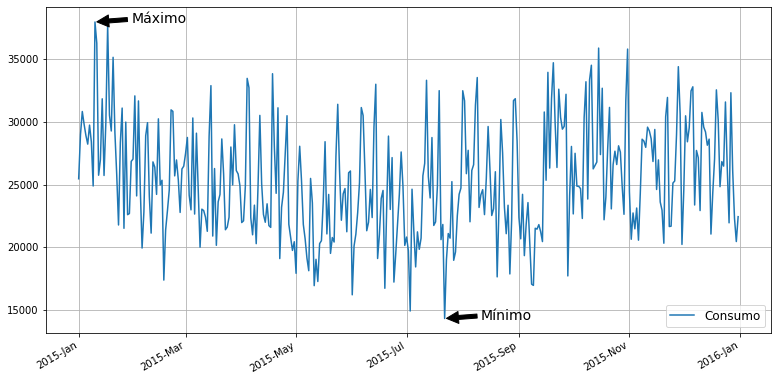

In [5]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(data['data'], data['consumo'], label='Consumo')
ax.legend(loc='lower right', fontsize=12)
ax.grid(True)

x1 = data['data'][data['consumo'].idxmax()]
y1 = max(data['consumo'])
x2 = data['data'][data['consumo'].idxmax()+20]
y2 = max(data['consumo'])-100

ax.annotate('Máximo', xy=(x1, y1), fontsize=14, xytext=(x2, y2),
           arrowprops=dict(facecolor='k', shrink=0.05))

a1 = data['data'][data['consumo'].idxmin()]
b1 = min(data['consumo'])
a2 = data['data'][data['consumo'].idxmin()+20]
b2 = min(data['consumo'])-100

ax.annotate('Mínimo', xy=(a1, b1), fontsize=14, xytext=(a2, b2),
           arrowprops=dict(facecolor='k', shrink=0.05))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

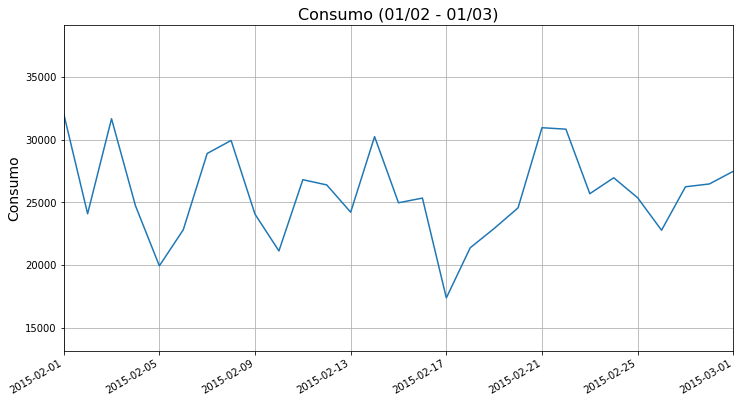

In [246]:
ax = sns.lineplot(x='data', y='consumo', data=data)
ax.set_xlim(datetime(2015,2,1), datetime(2015, 3,1))
ax.figure.set_size_inches(12, 6)
ax.grid(True)
ax.set_title('Consumo (01/02 - 01/03)', fontsize=16)
ax.set_ylabel('Consumo', fontsize=14)
ax.set_xlabel(None)

for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

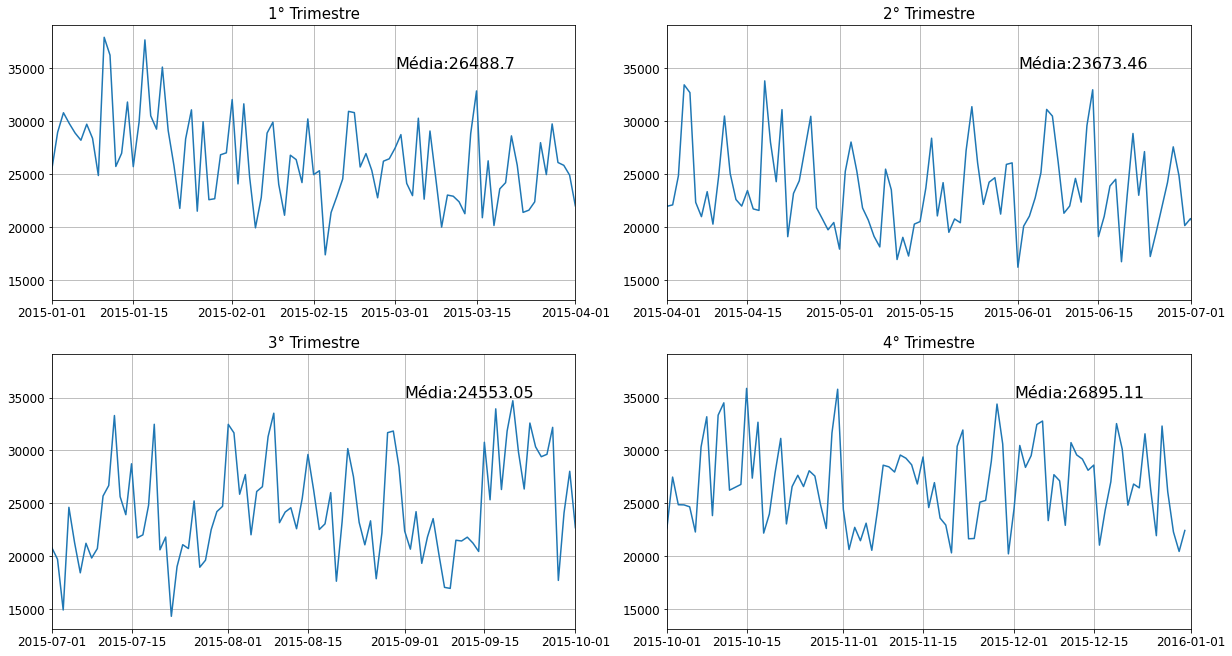

In [241]:
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True,
                       figsize=(17,9))
l = [(1, 4), (4, 7), (7, 10), (10, 1)]
trimestre = 1
for ax, lim in zip(axs.flat, l):
    if lim[0] != 10:   
        ax.plot(data['data'], data['consumo'])
        ax.set_xlim(datetime(2015,lim[0],1), datetime(2015, lim[1],1))
        ax.grid(True)
        ax.tick_params(labelsize=12)
        ax.set_title(f'{trimestre}° Trimestre', fontsize=15)
        trimestre += 1
        media = data[(data['data'] >= datetime(2015, lim[0], 1)) &
                 (data['data'] < datetime(2015, lim[1], 1))]['consumo'].mean()
        x1 = datetime(2015, lim[1]-1, 1)
        x2 = 35000
        ax.text(x1, x2, f'Média:{round(media, 2)}', fontdict=dict(fontsize=16))
        
    else:
        ax.plot(data['data'], data['consumo'])
        ax.set_xlim(datetime(2015,lim[0],1), datetime(2016, lim[1],1))
        ax.set_title(f'{trimestre}° Trimestre', fontsize=15)
        ax.tick_params(labelsize=12)
        ax.grid(True)
        media = data[(data['data'] >= datetime(2015, lim[0], 1)) &
                 (data['data'] < datetime(2016, lim[1], 1))]['consumo'].mean()
        x1 = datetime(2015, 12, 1)
        x2 = 35000
        ax.text(x1, x2, f'Média:{round(media, 2)}', fontdict=dict(fontsize=16))

fig.set_constrained_layout_pads(hspace=0.05)

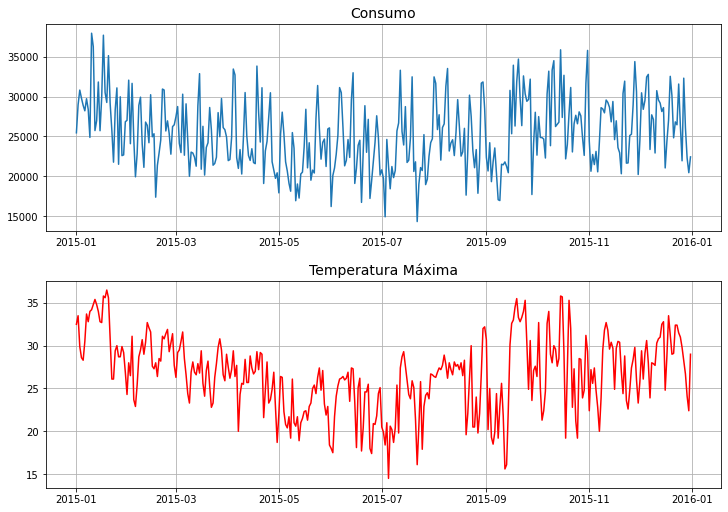

In [235]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7), constrained_layout=True)
axs[0].plot(data['data'], data['consumo'])
axs[0].grid(True)
axs[0].set_title('Consumo', fontsize=14)
axs[1].plot(data['data'], data['temp_max'], color='red')
axs[1].grid(True)
axs[1].set_title('Temperatura Máxima', fontsize=14)
fig.set_constrained_layout_pads(hspace=0.06)

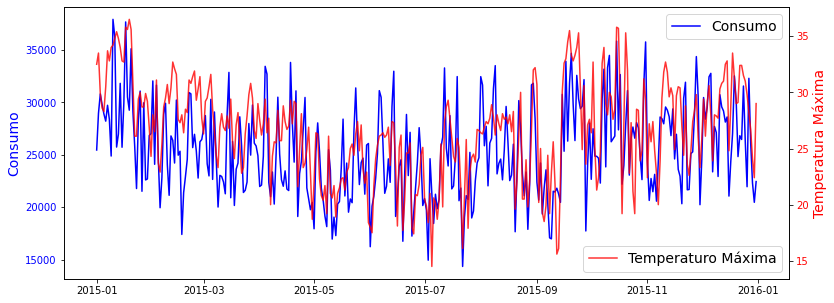

In [222]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(data['data'], data['consumo'], color='blue')
ax.legend(['Consumo'], loc='upper right', fontsize=14)
ax.set_ylabel('Consumo', fontsize=14, color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax2 = ax.twinx()
ax2.plot(data['data'], data['temp_max'], color='red', alpha=0.8, linestyle='-')
ax2.legend(['Temperaturo Máxima'], loc='lower right', fontsize=14)
ax2.set_ylabel('Temperatura Máxima', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')